In [5]:
import pandas as pd
import os

# concate date in one file:


In [6]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

merged_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    merged_data = pd.concat([merged_data, current_data])
    
    

## saving the data into csv file 

In [7]:
merged_data.to_csv("merged_data.csv", index=False)


In [8]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# some data cleaning



#### deleting Nan types rows:

In [10]:
nan_df = merged_data[merged_data.isna().any(axis=1)]
display(nan_df.head())

merged_data = merged_data.dropna(how='all')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### checking if there any nan rows

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
merged_data = merged_data[merged_data['Order Date'].str[0:2]!='Or']


### adjust columns data type:

##### quantity orderd to int
##### price to float
##### order date to date

In [13]:
#display(merged_data[pd.to_numeric(merged_data['Price Each']).isnull()])
#merged_data = merged_data.dropna(how='all')

merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])

merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'],downcast='integer')


display(merged_data.info())
display(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int8   
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int8(1), object(4)
memory usage: 8.7+ MB


None

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# add some new columns:

#### add month column:

In [14]:
merged_data['month'] = merged_data['Order Date'].str[0:2]
merged_data['month'] = pd.to_numeric(merged_data['month'])
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### alternative way to extract month and time :  (it consumes some time)

In [15]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

In [16]:
#merged_data['month'] = pd.to_datetime(merged_data['Order Date']).dt.month

merged_data['hour'] = merged_data['Order Date'].dt.hour
merged_data['minute'] = merged_data['Order Date'].dt.minute
merged_data['day'] = merged_data['Order Date'].dt.dayofweek
merged_data['week_day'] = merged_data['Order Date'].dt.day_name()


merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,week_day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,4,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,6,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1,Tuesday


#### add city column :

In [17]:
def get_city(address):
    
    return address.split(",")[1]

def get_address(address):
    
    return address.split(",")[2].split(" ")[1]

merged_data['city'] = merged_data['Purchase Address'].apply(lambda x: get_city(x) +"("+ get_address(x)+")")
merged_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,week_day,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,4,Friday,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,6,Sunday,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Friday,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Friday,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1,Tuesday,Los Angeles(CA)
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,13,3,0,Monday,San Francisco(CA)
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,7,46,1,Tuesday,Seattle(WA)
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,10,58,4,Friday,Atlanta(GA)
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,10,38,2,Wednesday,San Francisco(CA)
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,14,5,0,Monday,Boston(MA)


## What was the best month for sales?




In [18]:
merged_data['sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head(1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,week_day,city,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,4,Friday,Dallas(TX),23.9


In [19]:
merged_data.groupby(['month']).sum()['sales']


month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

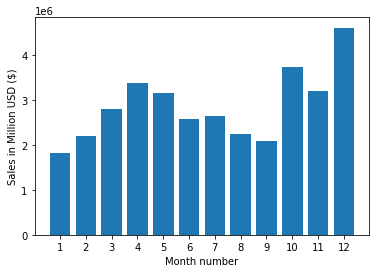

In [20]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,merged_data.groupby(['month']).sum()['sales'])
plt.xticks(months)

plt.ylabel('Sales in Million USD ($)')
plt.xlabel('Month number')
plt.show()

## which product sells the most?


In [21]:
product_quantity_sales = merged_data.groupby(['Product']).sum().sort_values(by='Quantity Ordered')

df = product_quantity_sales[['Quantity Ordered', 'sales','Price Each']]
df['Price Each'] = df['sales'] / df['Quantity Ordered']

df


<ipython-input-21-076fd094f2e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['sales'] / df['Quantity Ordered']


,Quantity Ordered,sales,Price Each
Product,,,
LG Dryer,646.0,387600.00,600.00
LG Washing Machine,666.0,399600.00,600.00
Vareebadd Phone,2068.0,827200.00,400.00
20in Monitor,4129.0,454148.71,109.99
ThinkPad Laptop,4130.0,4129958.70,999.99
Macbook Pro Laptop,4728.0,8037600.00,1700.00
Flatscreen TV,4819.0,1445700.00,300.00
Google Phone,5532.0,3319200.00,600.00
34in Ultrawide Monitor,6199.0,2355558.01,379.99


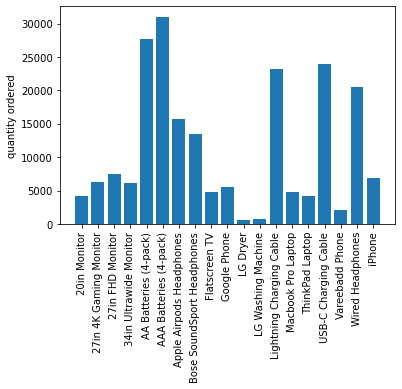

In [32]:
product_group = merged_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]

plt.bar(keys, quantity_ordered)
plt.ylabel('quantity ordered')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

### Is there any relation between product price and quantity orders?

<ipython-input-23-3e3e52c0943f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-23-3e3e52c0943f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


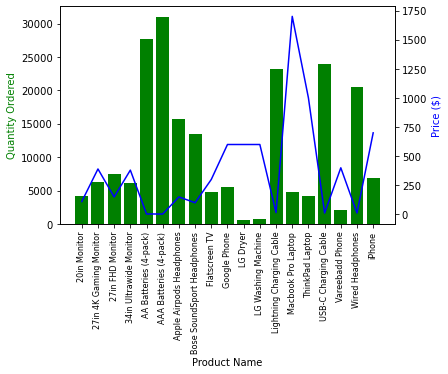

In [23]:

prices = merged_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### What city sold the most product?

In [24]:
merged_data.groupby(['city']).sum().sort_values(by='sales')[['Quantity Ordered', 'sales']]

,Quantity Ordered,sales
city,,
Portland(ME),2750.0,4.497583e+05
Austin(TX),11153.0,1.819582e+06
Portland(OR),11303.0,1.870732e+06
Seattle(WA),16553.0,2.747755e+06
Dallas(TX),16730.0,2.767975e+06
Atlanta(GA),16602.0,2.795499e+06
Boston(MA),22528.0,3.661642e+06
New York City(NY),27932.0,4.664317e+06
Los Angeles(CA),33289.0,5.452571e+06


<function matplotlib.pyplot.show(close=None, block=None)>

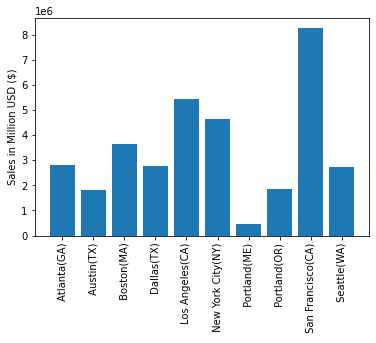

In [25]:
keys = [City for City, df in merged_data.groupby(['city'])]#dont use .unique() it leads to inconsistance 


plt.bar(keys,merged_data.groupby('city').sum()['sales'])
plt.ylabel('Sales in Million USD ($)')

plt.xticks(size=10, rotation='vertical')

plt.show


### Who are the best customers ?

In [26]:
df2=merged_data.groupby(['Order ID']).sum().sort_values(by='sales')
df=df2[['sales']]
df

,sales
Order ID,
204578,2.99
179089,2.99
302495,2.99
192132,2.99
267399,2.99
...,...
255318,3400.00
210292,3400.00
243728,3400.00


## what is the best time to boost advertisement?

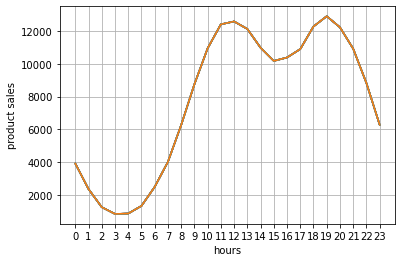

In [27]:
keys = [pair for pair, df in merged_data.groupby(['hour'])]


plt.plot(keys, merged_data.groupby(['hour']).count())
plt.ylabel('product sales')
plt.xlabel('hours')

plt.xticks(keys)

plt.grid()
plt.show()



## Is there any helpful relation between sales and week days?

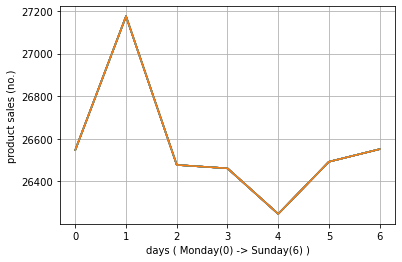

In [28]:
keys = [pair for pair, df in merged_data.groupby(['day'])]


plt.plot(keys, merged_data.groupby(['day']).count())
plt.ylabel('product sales (no.)')
plt.xlabel('days ( Monday(0) -> Sunday(6) )')


plt.xticks(keys)

plt.grid()
plt.show()

#In my openion the best time to boost advertisemnt is monday and start every day at 9:30 specially (Monday,Tuesday)

### Is there any products sold together?

In [29]:
#https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = merged_data[merged_data['Order ID'].duplicated(keep=False)]

#https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-29-a61db4595d4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [30]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin